In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:

ds = pd.read_csv('sales_data.csv', encoding ="Latin-1")
ds

# 'Latin-1' or 'unicode_escape' would work 

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [11]:
ds.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [12]:
ds.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [13]:
# Remove PRODUCTCODE
ds = ds.drop(columns=['PRODUCTCODE'])

# Remove address fields
ds = ds.drop(columns=['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'TERRITORY', 'CITY', 'STATE', 'COUNTRY'])

# Remove attributes that uniquely identify the customer or the order
ds = ds.drop(columns=['CUSTOMERNAME', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'PHONE'])

ds = pd.get_dummies(ds, columns=['PRODUCTLINE'])

ds

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,95,False,True,False,False,False,False,False
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,95,False,True,False,False,False,False,False
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,95,False,True,False,False,False,False,False
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,95,False,True,False,False,False,False,False
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,95,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,54,False,False,False,True,False,False,False
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,54,False,False,False,True,False,False,False
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,54,False,False,False,True,False,False,False
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,54,False,False,False,True,False,False,False


In [14]:
# convert ORDERDATE to numeric attribute
ds['ORDERDATE'] = pd.to_datetime(ds['ORDERDATE'])
ds['ORDERDATE'] = ds['ORDERDATE'].astype('int64')

ds['STATUS'] = ds['STATUS'].replace('Shipped',1)
ds['STATUS'] = ds['STATUS'].replace('Resolved', 2)
ds['STATUS'] = ds['STATUS'].replace('Cancelled', 3)
ds['STATUS'] = ds['STATUS'].replace('On Hold', 4)
ds['STATUS'] = ds['STATUS'].replace('Disputed', 5)
ds['STATUS'] = ds['STATUS'].replace('In Process', 6)

/tmp/ipykernel_3723/355115339.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds['STATUS'] = ds['STATUS'].replace('In Process', 6)


In [15]:
ds.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2.823000e+03,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,1.084235e+18,1.198371,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.992714e+16,0.803278,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.041811e+18,1.000000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,1.068120e+18,1.000000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,1.087258e+18,1.000000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,1.100693e+18,1.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,1.117498e+18,6.000000,4.000000,12.000000,2005.00000,214.000000


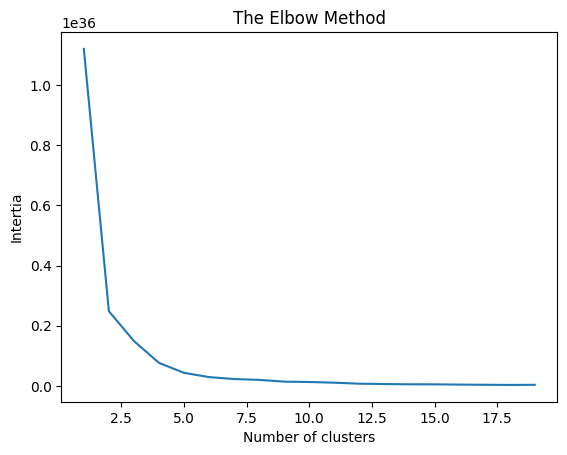

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

dataset = ds.values

WCSS = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1,20), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')
plt.show()



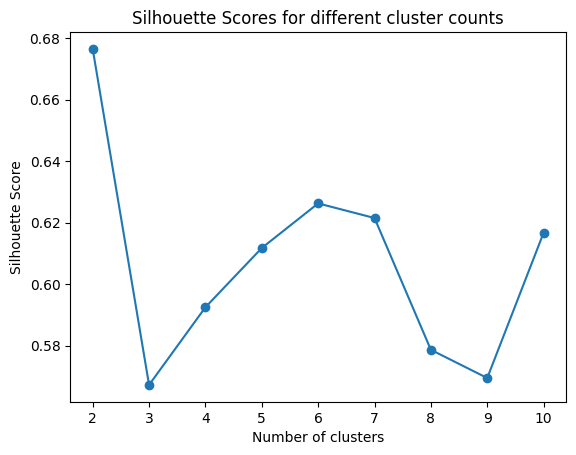

In [17]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):  # silhouette requires at least 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(dataset)
    score = silhouette_score(dataset, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores for different cluster counts")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

#The highest silhouette score indicates the best number of clusters.
#optional 


In [39]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(dataset)
labels = kmeans.predict(dataset)
centroids = kmeans.cluster_centers_

d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


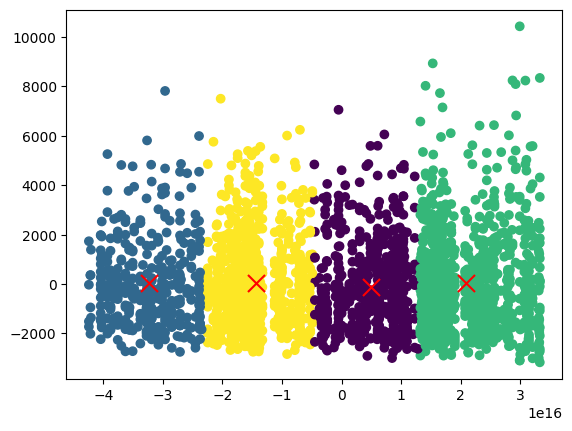

In [40]:
from sklearn.decomposition import PCA
pca = PCA(2)
reduced_dataset = pca.fit_transform(ds)
reduced_centroids = pca.transform(centroids)

plt.scatter(reduced_dataset[:,0], reduced_dataset[:,1], c=labels, cmap='viridis')
plt.scatter(reduced_centroids[:,0], reduced_centroids[:,1], marker='x', s=150, c='r')
